In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt

In [8]:
files = [f for f in os.listdir("/sw/apps/nasa") if f.endswith('csv')]

In [87]:
frames = []
idx = 0
for f in files:
    print(f)
    frames.append(pd.read_csv("/sw/apps/nasa/{}".format(f), header=None, names=["position","unixepoc","sdate", "stime", "metric", "val"]))
    frames[idx] = frames[idx].assign(timestamp=lambda x: x.sdate+" "+x.stime)
    frames[idx].timestamp = pd.to_datetime(frames[idx].timestamp)
    frames[idx] = frames[idx].drop(['sdate','stime','position','unixepoc','val'], axis=1)
    frames[idx] = frames[idx].set_index(['timestamp'])
    frames[idx].sort_index(inplace=True)
    idx += 1

barometric pressure.csv
humidity.csv
solar radiation.csv
sunrise.csv
sunset.csv
temperature.csv
wind direction in degrees.csv
wind speed.csv


## Barometric Pressure

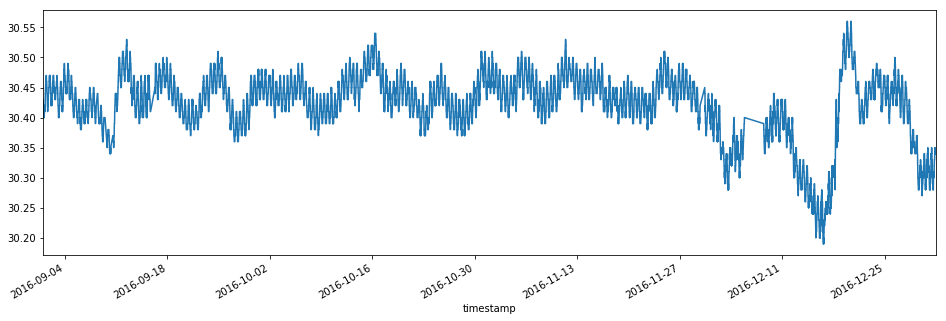

In [103]:
frames[0].metric.plot(figsize=(16,5))

## Humidity

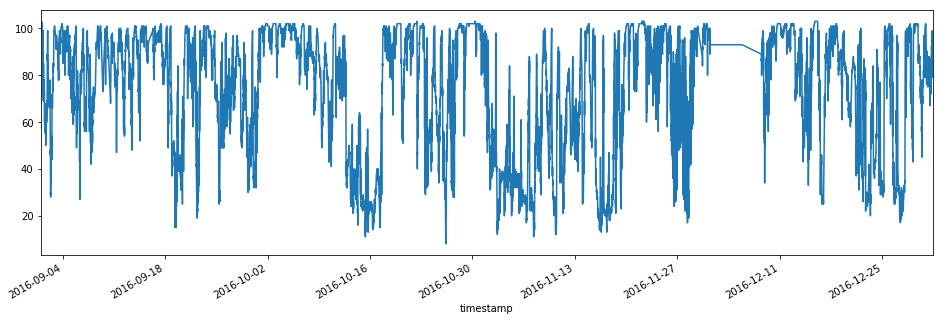

In [104]:
frames[1].metric.plot(figsize=(16,5))

## Solar Radiation

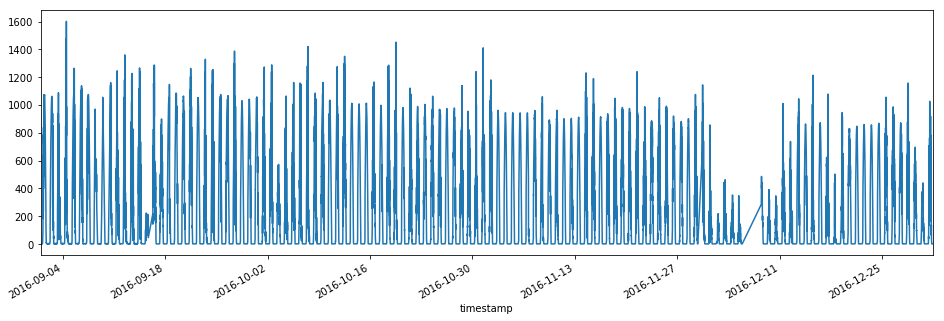

In [105]:
frames[2].metric.plot(figsize=(16,5))

## Sunrise

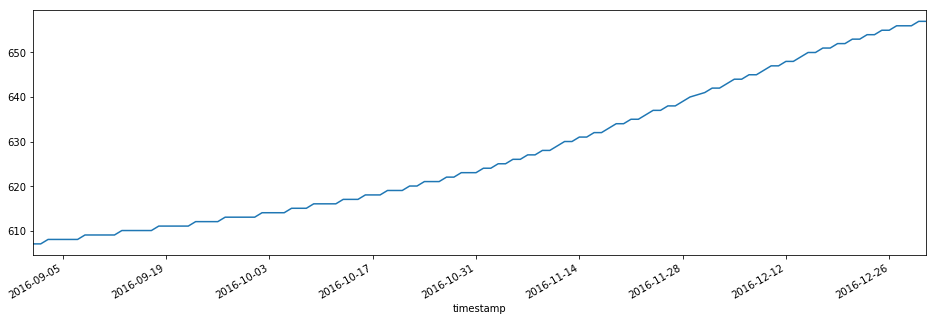

In [106]:
frames[3].metric.plot(figsize=(16,5))

## Sunset

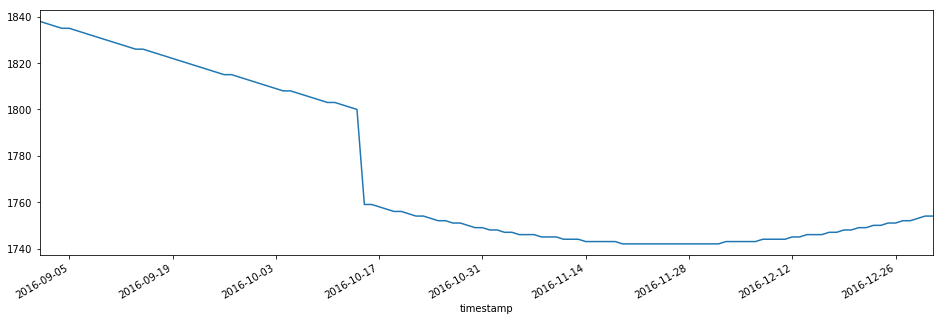

In [107]:
frames[4].metric.plot(figsize=(16,5))

## Temperature

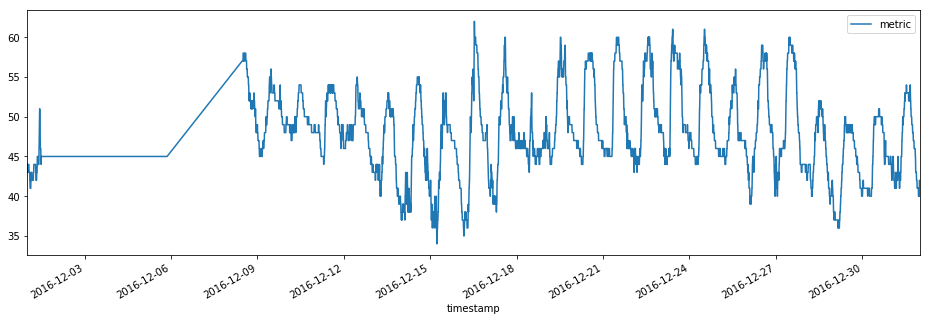

In [134]:
frames[5][frames[5].index.month==12].plot(figsize=(16,5))

In [140]:
frames[5][frames[5].index.month==12].metric.describe()

count    8164.000000
mean       47.608893
std         4.994597
min        34.000000
25%        45.000000
50%        47.000000
75%        50.000000
max        62.000000
Name: metric, dtype: float64

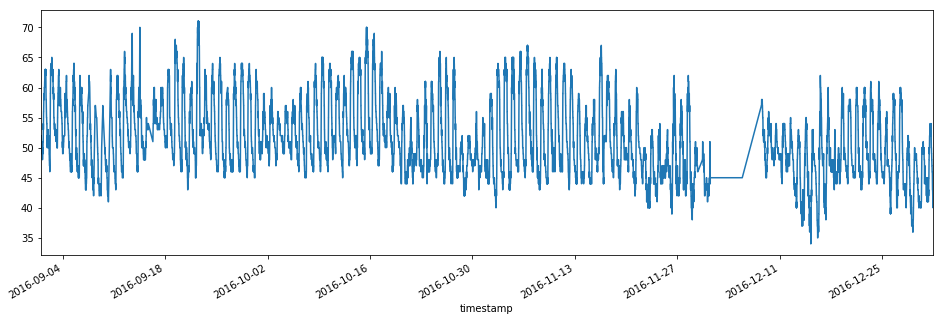

In [111]:
frames[5].metric.plot(figsize=(16,5))

## Wind Direction

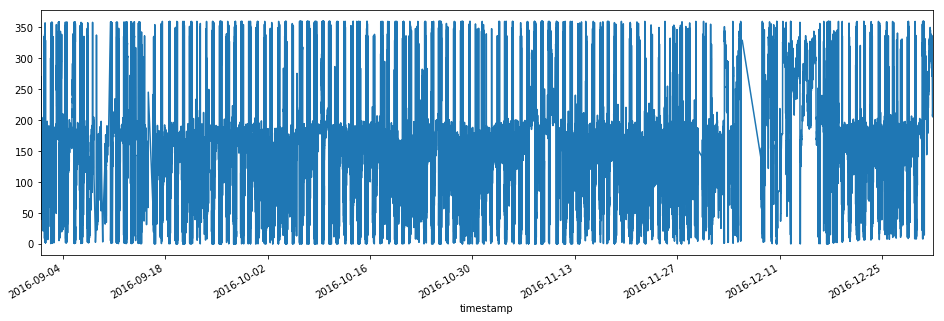

In [109]:
frames[6].metric.plot(figsize=(16,5))

##  Wind Speed

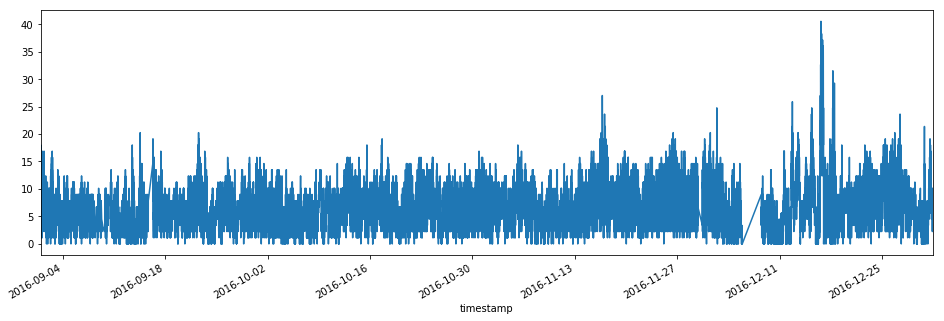

In [110]:
frames[7].metric.plot(figsize=(16,5))

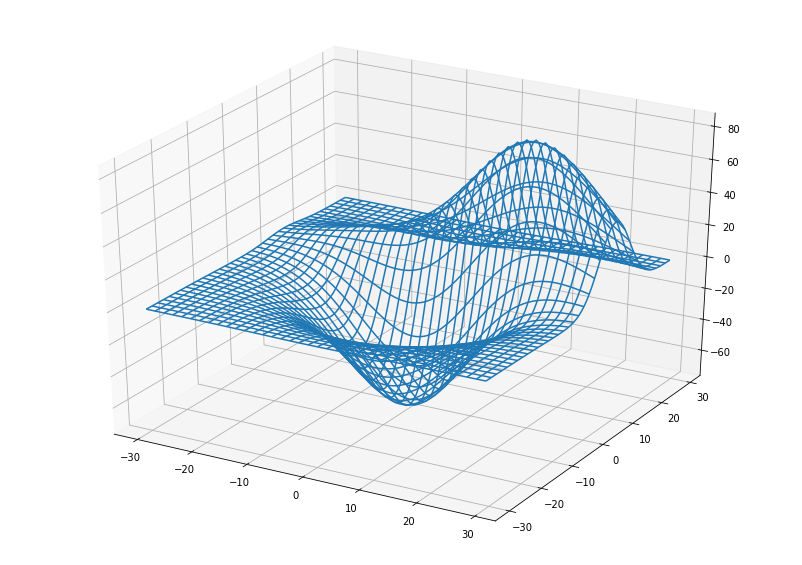

In [12]:
from mpl_toolkits.mplot3d import axes3d

def get_test_data(delta=0.05):

    from matplotlib.mlab import  bivariate_normal
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)

    Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
    Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
    Z = Z2 - Z1

    X = X * 10
    Y = Y * 10
    Z = Z * 500
    return X, Y, Z



fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')

x, y, z = axes3d.get_test_data(0.08)
ax.plot_wireframe(x,y,z, rstride=2, cstride=2)

plt.show()